**Student Name**: Tommy Kangdra

**Student ID**: A0218866N

# 0. Import the Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train_ori = pd.read_csv('./Data/train.csv')
df_test_ori = pd.read_csv('./Data/test.csv')

# 1.0 EDA

In [3]:
df_train_ori.Outcome.value_counts()

14    483982
13     83464
12     64990
9      49192
2      47268
7      42518
8      38590
5      32702
1      31270
0      24428
3      20200
10     16062
11      7168
4       6108
15      5184
6       2328
Name: Outcome, dtype: int64

In [4]:
def word_count(sentence):
    words = sentence.split()
    length = len(words)
    return length

In [5]:
df_test_ori['word_length'] = df_test_ori.Text.apply(word_count)

In [6]:
df_train_ori['word_length'] = df_train_ori.Text.apply(word_count)

# 2.0 Feature Engineering

In [7]:
stop_words = ['xd', 'xp', 'xa', 'the', 'and',
          'http', 'https', 'www', 'imgur',
          'quot', 'like', 'does', 'know', 
          'just', 'time', 'didn',
          'question', 'people', 'good',
          'want', #additional 3
          'using', 'tried', 'help', 'problem', 
          'used', 'need', 'create', 'title', 
          'possible', 'enter',
          'really', 'make', 'send', 'understand']

In [8]:
from nltk.corpus import stopwords
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer 

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()


def preprocess(input):
    
    pat1 = r'http?://[A-Za-z0-9./]+'
    pat2 = r'https?://[A-Za-z0-9./]+'
    combined_pat = r'|'.join((pat1, pat2))
    
    re1 = re.sub(combined_pat, '', input)
    text = re1.lower()
    
    
    remove_apo =  text.translate({ord(c): "" for c in "'"})
    removeSpecialChars =  remove_apo.translate({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
    words = removeSpecialChars.split()
    sentence_transform = []

#     stop_words = ['http', 'https', 'www', 'imgur',
#                   'quot', 'like', 'does', 'know', 
#                   'frac', 'just', 'time', 'didn',
#                   'question', 'people', 'good',
#                   'want']
    
    for word in words:
        word_transform = ""
        for character in word:
            if character.isalpha():
                word_transform += character
        if (word_transform not in stop_words) & (len(word_transform) > 1):
            if not(word_transform.isdigit()):
                word_lemmatize = lemmatizer.lemmatize(word_transform)
                sentence_transform.append(word_lemmatize)
    
    if len(sentence_transform) >= 100:
        output = ' '.join(sentence_transform[:100])
    else:
        output = ' '.join(sentence_transform)
    
    output = re.sub(' +', ' ', output)
    
    return output

In [9]:
from bs4 import BeautifulSoup
import re
def preprocess_new(text):
    bs = BeautifulSoup(text, 'lxml').get_text()
    return bs

In [10]:
def preprocess_simpler(text):
    text = text.lower()
    remove_apo =  text.translate({ord(c): "" for c in "'"})
    removeSpecialChars =  remove_apo.translate({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
    words = removeSpecialChars.split()
    sentence_transform = []
    
    for word in words:
        word_transform = ""
        for character in word:
            if character.isalpha():
                word_transform += character
        if (len(word_transform) > 2):
            if not(word_transform.isdigit()):
                sentence_transform.append(word_transform)
    
    return ' '.join(sentence_transform)

# Spltting Train, Test, Final Test

In [11]:
df_train = df_train_ori.copy()
df_finaltest = df_test_ori.copy()

In [12]:
from sklearn.model_selection import train_test_split

X = df_train['Text']
y = df_train['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1234, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((812135,), (143319,), (812135,), (143319,))

In [13]:
import random
np.random.seed = 42
num_sample = 20000

index_train = []
for i in range(16):
    index_list = list(y_train[y_train == i].index)
    if len(index_list) > num_sample:
        index_train += (random.sample(index_list, num_sample))
    else:
        index_train += (index_list)

test_sample = 350
index_test = []
for i in range(16):
    index_list = list(y_test[y_test == i].index)
    if len(index_list) > test_sample:
        index_test += (random.sample(index_list, test_sample))
    else:
        index_test += (index_list)
        
print(len(index_train), len(index_test))

248493 5599


In [14]:
df_train = df_train_ori.loc[index_train].copy()
df_test = df_train_ori.loc[index_test].copy()
df_finaltest = df_test_ori.copy()

In [15]:
import random
try10 = random.sample(list(df_train.index), 10)

for idx in try10:
    print('==original==')
    print(df_train.loc[idx, 'Text'], df_train.loc[idx, 'Outcome'])
    print('==preprocess==')
    print(preprocess(df_train.loc[idx, 'Text']))
    print('\n')

==original==
Recently i update my Samsung Galaxy S2 OS from 2.3 to 4.0 after that the internet is not wroking properly (i.e. Internet web, facebook, twitter) if i open this application &quot;unfortunately internet stopped&quot; this message is appearing. Pls help me to fix this problem? 3
==preprocess==
recently update samsung galaxy o internet wroking properly internet web facebook twitter open application quot unfortunately internet stopped quot message appearing pls help fix problem


==original==
Whats the correct way to programmatically include unpublished content in entity reference fields? (without views) 8
==preprocess==
whats correct way programmatically include unpublished content entity reference field without view


==original==
I've just begun to study knot theory and I'm wondering how does the one-point compactification of $\mathbb{R}^3$ change the knot group of a knot $K$, e.g. if $\pi(\mathbb{R}^3 \backslash K)$ is isomorphic to $\pi(\mathbb{S}^3 \backslash K)$. My intu

In [25]:
from tqdm import tqdm
tqdm.pandas()

In [17]:
df_train['Text'] = df_train['Text'].progress_apply(preprocess_new)
df_test['Text'] = df_test['Text'].progress_apply(preprocess_new)
df_finaltest['Text'] = df_finaltest['Text'].progress_apply(preprocess_new)

 78%|███████████████████████████████████████████████████████▉                | 193232/248493 [00:37<00:09, 5675.09it/s]C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\bs4\__init__.py:424: MarkupResemblesLocatorWarning: "http://physics.stackexchange.com/questions/266308/do-pear-shaped-nuclei-really-have-anything-to-do-with-time-travel/266388#266388" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
  7%|████▉                                                                    | 37277/552735 [00:06<01:35, 5373.01it/s]C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\bs4\__init__.py:424: MarkupResemblesLocatorWarning: "http://peoplesworld.org/a-21-year-old-signs-up-to-recall-glenn-grothman/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get 

In [18]:
df_train['prep'] = df_train['Text'].progress_apply(preprocess)
df_test['prep'] = df_test['Text'].progress_apply(preprocess)
df_finaltest['prep'] = df_finaltest['Text'].progress_apply(preprocess)

100%|███████████████████████████████████████████████████████████████████████| 552735/552735 [00:38<00:00, 14383.87it/s]


In [19]:
# from tqdm import tqdm
# tqdm.pandas()

# df_train['prep_simpler'] = df_train['Text'].progress_apply(preprocess_simpler)
# df_finaltest['prep_simpler'] = df_finaltest['Text'].progress_apply(preprocess_simpler)

In [20]:
special_char = '!@#$%^&*()[]{}"\/;:,.<>|=-`~?'
special_char += "'"

train_feature_matrix = []
test_feature_matrix = []
final_test_feature_matrix = []

for i in tqdm(special_char):
    train_feature_matrix += [df_train.Text.apply(lambda x: x.count(i)).values]
    test_feature_matrix += [df_test.Text.apply(lambda x: x.count(i)).values]
    final_test_feature_matrix += [df_finaltest.Text.apply(lambda x: x.count(i)).values]

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:11<00:00,  2.65it/s]


In [21]:
df_train['count_num'] = df_train.Text.progress_apply(lambda x: sum(n.isdigit() for n in x))
df_test['count_num'] = df_test.Text.progress_apply(lambda x: sum(n.isdigit() for n in x))
df_finaltest['count_num'] = df_finaltest.Text.progress_apply(lambda x: sum(n.isdigit() for n in x))

100%|██████████████████████████████████████████████████████████████████████| 552735/552735 [00:03<00:00, 145160.38it/s]


In [22]:
train_feature_matrix += [df_train.count_num.values]
test_feature_matrix += [df_test.count_num.values]
final_test_feature_matrix += [df_finaltest.count_num.values]

In [23]:
train_feature_matrix = np.array(train_feature_matrix).T
test_feature_matrix = np.array(test_feature_matrix).T
final_test_feature_matrix = np.array(final_test_feature_matrix).T

print(train_feature_matrix.shape, test_feature_matrix.shape, final_test_feature_matrix.shape)

(248493, 31) (5599, 31) (552735, 31)


In [24]:
X_train = df_train.prep
X_test = df_test.prep
y_train = df_train.Outcome
y_test = df_test.Outcome

# On Vader Sentiment Analysis

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df_train['compound'] = df_train['Text'].progress_apply\
                            (lambda x: sid.polarity_scores(x)['compound'])
df_test['compound'] = df_test['Text'].progress_apply\
                            (lambda x: sid.polarity_scores(x)['compound'])
df_finaltest['compound'] = df_finaltest['Text'].progress_apply\
                            (lambda x: sid.polarity_scores(x)['compound'])

100%|████████████████████████████████████████████████████████████████████████| 552735/552735 [01:13<00:00, 7501.22it/s]


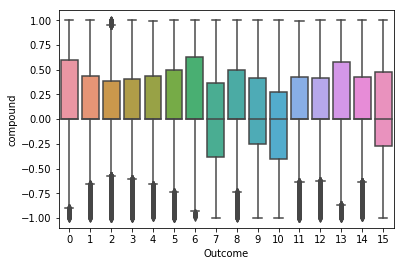

In [35]:
sns.boxplot(x="Outcome", y="compound", data=df_train)
plt.show()

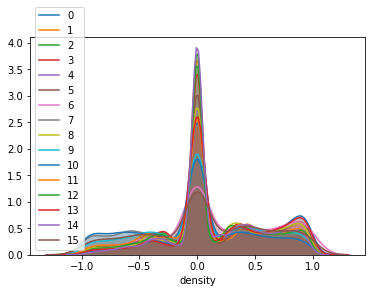

In [36]:
for x in df_train.Outcome.unique():
    sns.distplot(df_train.loc[df_train['Outcome']==x,'compound'], hist=False, kde=True, kde_kws={'shade':True},label=x, axlabel="density")
plt.legend()

# 2.3. Feature Engineering Addition

In [26]:
train_feature_matrix.shape, final_test_feature_matrix.shape

((248493, 31), (552735, 31))

# 2.4 Vectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 2, max_df = 1.0, ngram_range = (1,2))
# vectorizer = CountVectorizer(stop_words = 'english', min_df = 2)
X_train_vec = vectorizer.fit_transform(df_train.prep)
X_test_vec = vectorizer.transform(df_test.prep)

In [28]:
X_train_vec.shape, X_test_vec.shape

((248493, 725659), (5599, 725659))

# 2.5 Combining Vectorizer & Feature Engineering Addition

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_feature_matrix_scaled = scaler.fit_transform(train_feature_matrix)
test_feature_matrix_scaled = scaler.transform(test_feature_matrix)

In [30]:
from scipy.sparse import hstack

X_train_feature = hstack([X_train_vec, train_feature_matrix_scaled])
print('Shape of train data :',X_train_feature.shape)

X_test_feature = hstack([X_test_vec, test_feature_matrix_scaled])
print('Shape of test data :',X_test_feature.shape) 

Shape of train data : (248493, 725690)
Shape of test data : (5599, 725690)


# 2.6 Oversampling (SMOTE)

In [32]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train_feature, y_train)

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer

#Define TF-IDF Vectorizer
# vectorizer = CountVectorizer(stop_words='english', min_df = 2)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X_train_feature, y_train)

**Information:**

train: X_SMOTE, y_SMOTE

test: X_test_feature, y_test

# 3.0 Model

## 3.1 Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_SMOTE_vec, y_SMOTE_vec = sm.fit_resample(X_train_vec, y_train)

lr = LogisticRegression(C = 1e5)
lr.fit(X_SMOTE_vec, y_SMOTE_vec)
lr_pred = lr.predict(X_test_vec)

C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, lr_pred),2))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

0.87
[[318   0   1   1   0   0   0   0  28   0   0   0   0   2   0   0]
 [  0 327   1   3   0   1   0   1   0   6   4   0   1   4   0   2]
 [  3   2 313  19   0   3   0   1   1   5   0   1   1   1   0   0]
 [  2   0  25 303   1   2   0   0   5   6   0   2   1   2   0   1]
 [  0   1   0   0 298   6   0   5   0   3   1   1  24   5   2   4]
 [  1   0   3   1   0 321   0   0   3   2   2   1  12   2   1   1]
 [  1   7   1   0   1   6 249   6   2   8   4   8  11   3  23  19]
 [  1   2   0   0   4   2   0 281   0  13  40   1   1   0   1   4]
 [ 19   1   2   1   0   0   0   0 320   2   0   1   0   4   0   0]
 [  0   1   4   6   1   6   0   6   1 311   7   2   2   0   1   2]
 [  0   3   3   2   3   0   0  68   2  11 252   0   2   1   0   3]
 [  0   4   2   0   0   6   1   1   5   8   1 319   0   1   1   1]
 [  0   0   0   0  11  17   0   0   1   4   2   0 300   0  15   0]
 [  2   0   0   2   2   0   0   0   2   1   0   1   0 338   2   0]
 [  0   1   0   0   0   1   2   0   0   2   1   0   8   6

**Logistic Regression with sentiment analysis from Vader**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from scipy.sparse import hstack

vader_feature_train = df_train.compound.values.reshape(-1,1)
vader_feature_test = df_test.compound.values.reshape(-1,1)
X_train_vader = hstack([X_train_vec, vader_feature_train])
X_test_vader = hstack([X_test_vec, vader_feature_test])

print('Shape of train data :',X_train_vader.shape)
print('Shape of test data :',X_test_vader.shape) 

sm = SMOTE()
X_SMOTE_vader, y_SMOTE_vader = sm.fit_resample(X_train_vader, y_train)

lr = LogisticRegression(C = 1e5)
lr.fit(X_SMOTE_vader, y_SMOTE_vader)
lr_pred = lr.predict(X_test_vader)

Shape of train data : (248493, 725782)
Shape of test data : (5599, 725782)


C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, lr_pred),2))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

0.87
[[313   0   1   1   0   0   0   0  34   0   0   0   0   1   0   0]
 [  1 326   1   2   0   2   0   2   0   4   3   0   2   3   0   4]
 [  2   2 311  19   0   2   0   2   2   6   1   0   1   1   1   0]
 [  2   0  15 311   1   2   0   0   4   9   0   2   1   1   0   2]
 [  0   1   0   0 299   6   0   5   0   2   2   1  23   4   2   5]
 [  1   0   3   2   0 322   1   0   2   2   2   0  11   1   2   1]
 [  0   5   1   0   0   4 280   4   2   2   1   5   9   1  22  13]
 [  1   2   0   0   4   2   0 272   0   9  52   1   1   0   1   5]
 [ 18   1   2   1   0   0   0   0 319   3   0   1   0   4   0   1]
 [  0   2   4   6   1   3   1  12   3 304   7   2   2   0   1   2]
 [  0   3   2   0   4   1   0  65   2  12 255   0   1   0   1   4]
 [  1   3   1   0   0   4   5   1   6   9   1 315   0   2   1   1]
 [  0   0   0   0   9  16   2   2   1   3   2   0 301   0  13   1]
 [  3   0   0   2   2   0   0   0   2   1   0   0   0 337   3   0]
 [  0   1   0   0   0   1   4   0   0   2   1   0  12   5

## 3.2 Linear SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_SMOTE, y_SMOTE)
svc_pred = svc.predict(X_test_feature)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, svc_pred),2))
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

# 3.3 Multinomial NB

In [65]:
print(X_train_vec.shape, X_test_vec.shape)

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer

sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X_train_vec, y_train)

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha = 0.04)
nb.fit(X_SMOTE, y_SMOTE)
nb_pred = nb.predict(X_test_vec)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, nb_pred),2))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

(248493, 725781) (5599, 725781)
0.89
[[321   0   1   1   0   0   0   0  26   0   0   0   0   1   0   0]
 [  0 328   1   1   2   2   2   4   0   1   4   0   0   1   0   4]
 [  3   2 309  21   0   3   0   1   2   4   0   1   0   4   0   0]
 [  1   0  20 315   0   3   0   0   3   2   0   1   2   1   0   2]
 [  0   1   2   0 316   5   1   4   0   0   3   0  10   2   1   5]
 [  0   0   0   2   0 331   0   0   2   0   1   1   9   0   3   1]
 [  0   3   1   0   0   0 304   3   0   1   0   7   4   3   8  15]
 [  1   0   0   0   4   1   0 287   0   4  47   1   3   0   0   2]
 [ 22   1   1   0   0   1   0   0 320   0   0   1   0   4   0   0]
 [  1   1  10   4   1   4   0  15   1 299   6   0   3   2   1   2]
 [  1   2   1   1   1   0   0  64   1   8 265   0   2   0   0   4]
 [  1   2   2   0   0   2   4   0   5   5   0 324   0   1   1   3]
 [  0   0   0   0  14  19   2   3   0   1   2   0 296   0  13   0]
 [  1   0   4   1   1   0   0   0   4   0   0   0   0 338   1   0]
 [  0   0   0   0   2   2

In [70]:
X_train_vec.shape, X_test_vec.shape

from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_feature_matrix_scaled = scaler.fit_transform(train_feature_matrix)
test_feature_matrix_scaled = scaler.transform(test_feature_matrix)

X_train_feature = hstack([X_train_vec, train_feature_matrix_scaled])
X_test_feature = hstack([X_test_vec, test_feature_matrix_scaled])
print('Shape of train data :',X_train_feature.shape)
print('Shape of test data :',X_test_feature.shape) 

sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X_train_feature, y_train)

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha = 0.04)
nb.fit(X_SMOTE, y_SMOTE)
nb_pred = nb.predict(X_test_feature)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, nb_pred),2))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Shape of train data : (248493, 725812)
Shape of test data : (5599, 725812)
0.89
[[321   0   1   1   0   0   0   0  26   0   0   0   0   1   0   0]
 [  0 327   1   1   2   2   2   4   0   1   4   0   0   1   0   5]
 [  3   2 308  22   0   3   0   1   2   4   0   1   0   4   0   0]
 [  1   0  20 315   0   3   0   0   3   2   0   1   2   1   0   2]
 [  0   1   2   0 318   4   0   4   0   0   3   0  10   3   1   4]
 [  0   0   0   2   0 331   0   0   2   0   1   1   9   0   3   1]
 [  0   2   1   0   0   1 305   3   0   1   0   9   5   3   9  10]
 [  1   0   0   0   2   1   0 292   0   4  44   1   3   0   0   2]
 [ 22   1   1   0   0   1   0   0 320   0   0   1   0   4   0   0]
 [  1   1   9   3   2   4   0  15   1 300   6   0   3   2   1   2]
 [  1   2   1   1   1   0   0  61   1   8 268   0   2   0   0   4]
 [  1   2   2   0   0   2   3   0   4   5   0 326   0   1   1   3]
 [  0   0   0   0  15  19   2   3   0   1   2   0 294   0  14   0]
 [  1   0   4   1   1   0   0   0   4   0   0   0

Random Over Sampling vs SMOTE

In [34]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha = 0.04)
nb.fit(X_SMOTE, y_SMOTE)
nb_pred = nb.predict(X_test_feature)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, nb_pred),2))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

0.9
[[327   1   2   0   0   0   0   0  15   1   0   1   1   2   0   0]
 [  0 330   1   1   3   3   1   3   0   2   3   0   0   2   0   1]
 [  4   0 317  22   1   1   0   0   0   2   0   0   0   3   0   0]
 [  0   0  17 329   0   1   0   1   1   1   0   0   0   0   0   0]
 [  0   0   1   0 318   4   0   7   0   2   3   0  11   2   0   2]
 [  0   1   1   2   3 330   0   0   1   0   0   1   6   2   3   0]
 [  0   1   1   0   0   1 304   4   0   1   0   8   5   4   9  11]
 [  0   1   0   1   4   1   0 275   1   6  52   0   6   0   1   2]
 [ 14   1   4   3   1   0   0   0 321   0   0   1   0   4   1   0]
 [  1   5   9   4   6   3   4   6   0 294   7   1   3   3   1   3]
 [  0   1   0   1   3   0   1  58   0   7 272   1   2   0   1   3]
 [  0   2   2   3   0   0   4   0   3   5   0 322   0   4   3   2]
 [  0   0   0   1   8  11   3   2   0   1   2   0 313   2   7   0]
 [  2   0   5   0   0   0   0   0   1   0   0   0   1 341   0   0]
 [  1   1   0   0   1   3   4   4   0   2   2   1  14   3 

In [35]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha = 0.04)
nb.fit(X_ros, y_ros)
nb_pred = nb.predict(X_test_feature)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, nb_pred),2))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

0.89
[[327   1   2   0   0   0   0   0  16   1   0   0   1   2   0   0]
 [  0 332   1   1   2   3   1   4   0   3   0   0   0   2   0   1]
 [  4   0 321  18   0   2   0   0   0   2   0   0   0   3   0   0]
 [  0   0  24 322   0   1   0   1   1   1   0   0   0   0   0   0]
 [  0   0   1   0 284  11   1  18   0   4   3   0  23   4   0   1]
 [  0   1   1   2   0 331   0   0   1   0   0   0   8   3   3   0]
 [  0   2   1   0   0   1 322   4   0   1   0   2   5   2   9   0]
 [  0   1   0   0   0   2   1 296   1   7  35   0   6   0   1   0]
 [ 14   1   4   3   0   0   0   0 322   0   0   1   0   4   1   0]
 [  1   5  10   3   1   3   4   8   0 304   4   0   3   3   1   0]
 [  1   2   1   1   0   0   1  79   0  10 251   0   2   0   1   1]
 [  0   2   6   4   0   2   9   0   8   6   0 302   1   4   4   2]
 [  0   0   0   1   1  12   2   2   0   2   1   0 320   2   7   0]
 [  2   0   5   0   0   0   0   0   1   0   0   0   1 341   0   0]
 [  1   1   0   0   0   3   4   5   1   2   0   0  14   3

# 3.4 TF-IDF vs Count_Vectorizer

**Count Vectorizer**

In [78]:
X_train = df_train.prep.loc[index_train]
X_test = df_test.prep.loc[index_test]

params = {'clf__alpha': [0.01, 0.1, 1],
#           'tfidf__use_idf': [True, False],
          'vect__min_df': [1, 2, 3],
          'vect__max_df': [0.5, 0.75, 1.0],
          'vect__ngram_range' : [(1,1), (1,2), (1,3)]}

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

In [ ]:
random_search = RandomizedSearchCV(pipeline, params, cv = 5, scoring = 'f1_macro', random_state=42)
random_search.fit(X_train, y_train)
random_search.best_params_

In [ ]:
params = {'clf__alpha': [0.01, 0.1, 1],
          'tfidf__use_idf': [True, False],
          'vect__min_df': [1, 2, 3],
          'vect__max_df': [0.5, 0.75, 1.0],
          'vect__ngram_range' : [(1,1), (1,2), (1,3)]}

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

In [53]:
random_search = RandomizedSearchCV(pipeline, params, cv = 5, scoring = 'f1_macro')
random_search.fit(X_train, y_train)
random_search.best_params_

{'vect__ngram_range': (1, 2),
 'vect__min_df': 1,
 'vect__max_df': 0.5,
 'tfidf__use_idf': True,
 'clf__alpha': 0.01}

## TFIDF

In [44]:
len(X_test), len(y_test)

(143319, 15043)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer


pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 2, 
                             max_df = 1.0,
                             ngram_range = (1,2))),
    ('tfidf', TfidfTransformer(use_idf = True)),
    ('clf', MultinomialNB(alpha = 0.01)),
])
pipeline.fit(X_train, y_train)
pipe_pred = pipeline.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, pipe_pred),2))
print(confusion_matrix(y_test, pipe_pred))
print(classification_report(y_test, pipe_pred))

0.89
[[325   1   3   0   0   0   0   0  16   1   0   0   2   2   0   0]
 [  0 332   0   2   2   4   0   3   0   3   2   0   0   1   0   1]
 [  3   0 319  20   0   2   0   0   0   2   1   0   0   3   0   0]
 [  0   0  23 322   0   2   0   1   1   1   0   0   0   0   0   0]
 [  0   1   1   0 302   5   0  12   0   4   3   0  18   2   0   2]
 [  0   1   1   2   1 331   0   0   1   0   0   1   8   2   2   0]
 [  0   6   2   1   0   2 256   4   0   5   2  10  15   7  22  17]
 [  0   1   0   0   0   2   0 290   1   6  43   0   6   0   1   0]
 [ 15   1   4   2   0   0   0   0 322   0   0   1   0   4   1   0]
 [  2   5  10   5   3   2   0   8   1 300   5   0   4   3   2   0]
 [  1   2   1   1   1   0   0  73   0   8 260   0   1   0   1   1]
 [  0   2   6   4   0   1   1   0   4   5   0 316   1   4   4   2]
 [  0   0   0   1   5  12   0   2   0   1   2   0 318   1   8   0]
 [  1   0   4   0   0   0   0   0   1   0   0   0   1 343   0   0]
 [  1   1   0   0   0   4   1   5   1   2   0   0  15   3

# Count Vectorizer

In [38]:
pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 3, 
                             max_df = 0.5,
                             ngram_range = (1,2))),
    ('tfidf', TfidfTransformer(use_idf = False)),
    ('clf', MultinomialNB(alpha = 0.01)),
])
pipeline.fit(X_train, y_train)
pipe_pred = pipeline.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, pipe_pred),2))
print(confusion_matrix(y_test, pipe_pred))
print(classification_report(y_test, pipe_pred))

0.89
[[326   1   2   0   0   0   0   0  18   0   0   0   1   2   0   0]
 [  0 331   1   1   2   3   0   3   0   3   3   0   0   2   0   1]
 [  4   0 321  17   0   2   0   0   0   2   0   0   0   4   0   0]
 [  0   0  23 320   0   1   0   2   3   1   0   0   0   0   0   0]
 [  0   1   1   0 305   5   0  15   0   3   2   0  13   3   0   2]
 [  0   0   1   2   0 331   0   0   2   0   0   0   9   3   2   0]
 [  0   6   2   1   0   4 256   5   0   5   2   7  15   6  23  17]
 [  0   1   0   1   1   1   0 282   1   7  48   0   6   0   2   0]
 [ 17   1   2   3   0   0   0   0 322   0   0   1   0   3   1   0]
 [  1   4   8   2   2   2   0   7   1 307   5   0   4   3   3   1]
 [  0   2   1   1   0   0   0  69   0  12 261   0   2   0   1   1]
 [  0   2   5   4   0   1   2   0   4   6   0 317   1   4   3   1]
 [  0   1   0   1   5  11   0   2   0   2   2   0 316   2   8   0]
 [  1   0   4   1   0   0   0   0   2   1   0   0   1 340   0   0]
 [  1   1   0   0   0   4   0   2   1   4   1   0  14   3

# Try 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df = 3, 
                             max_df = 0.5)
X_train_vec = vectorizer.fit_transform(X.loc[index_train])
X_test_vec = vectorizer.transform(X.loc[index_test])

In [44]:
from scipy.sparse import hstack

X_train_feature = hstack([X_train_vec, train_count])
print('Shape of train data :',X_train_feature.shape)

X_test_feature = hstack([X_test_vec, test_count])
print('Shape of train data :',X_test_feature.shape) 

Shape of train data : (294257, 52999)
Shape of train data : (15043, 52999)


In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer

#Define TF-IDF Vectorizer
# vectorizer = CountVectorizer(stop_words='english', min_df = 2)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X_train_feature, y_train)

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

param_grid = [{'alpha': (1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01, 0.02, 0.04, 0.08)}]

nb = MultinomialNB()
random_search = RandomizedSearchCV(nb, param_grid, cv = 5, scoring = 'f1_macro')
random_search.fit(X_SMOTE, y_SMOTE)
random_search.best_params_

{'alpha': 0.01}

In [47]:
nb = MultinomialNB(alpha = 0.01)
nb.fit(X_SMOTE, y_SMOTE)
pred = nb.predict(X_test_feature)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, pred),2))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.82
[[677   3  89  29   4   6   4   1 122   9   2  17   2  35   0   0]
 [  0 948   1   1   3  10   0   8   2   3   8   1   0   3   0  12]
 [  2   7 861  60   2   8   0   2  13  17   2   8   0  16   0   2]
 [  4   1  66 881   4   9   0   2   7  16   1   3   0   4   0   2]
 [  0   4   0   0 837   5   1  26   0   5  10   0  11  10   2   5]
 [  3   0   5  15  13 907   3   1   5  10   3   3  18   8   4   2]
 [  1   8   2   0   1   7 252   5   2   4   1  12   0   1  19  34]
 [  2   1   0   1  14   4   0 770   0  27 177   0   1   0   0   3]
 [ 70   4  71  30   2   6   2   1 712   9   0  34   2  49   3   5]
 [  6   4  29  19  15   9   3  32   7 831  26   5   3   5   0   6]
 [  2   7   5   4  12   3   1 195   1  27 723   5   2   1   0  12]
 [  2   4   4   2   0   4   9   3   8  18   0 936   2   2   1   5]
 [  1   7   1   3 137  90  10  34   2  15  17   6 599   4  73   1]
 [  4   8  13   5   6   6   2   1  14   4   0   5   2 926   2   2]
 [  7   4   1   1   8  34  47   9   2   5   6  11  64  36

In [48]:
X_finaltest = df_test['prep']
X_finaltest_vec = vectorizer.transform(X_finaltest)

In [49]:
final_test_count = df_test[['count_dot', 'count_apo', 'count_bracket', 'count_exc', 
                         'count_comma','count_apo', 'count_bracket', 'count_quote',
                         'count_question', 'count_up']]\
                    .to_numpy()

X_final_test_feature = hstack([X_finaltest_vec, final_test_count])
print('Shape of train data :',X_final_test_feature.shape)

Shape of train data : (552735, 52999)


In [50]:
nb_final_pred = nb.predict(X_final_test_feature)

pred_df = pd.DataFrame({'Id': df_test.Id, 'Outcome' :nb_final_pred}).set_index('Id', drop = True)

pred_df.to_csv('submission26_tfidf_tuning.csv')

# 4.1 Final Main Model

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

param_grid = [{'alpha': (1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01, 0.02, 0.04, 0.08)}]

nb = MultinomialNB()
random_search = RandomizedSearchCV(nb, param_grid, cv = 5, scoring = 'f1_macro')
random_search.fit(X_SMOTE, y_SMOTE)
random_search.best_params_

{'alpha': 0.04}

In [45]:
nb = MultinomialNB(alpha = 0.04)
nb.fit(X_SMOTE, y_SMOTE)
pred = nb.predict(X_test_feature)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, pred),2))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9
[[327   1   2   0   0   0   0   0  15   1   0   1   1   2   0   0]
 [  0 330   1   1   3   3   1   3   0   2   3   0   0   2   0   1]
 [  4   0 317  22   1   1   0   0   0   2   0   0   0   3   0   0]
 [  0   0  17 329   0   1   0   1   1   1   0   0   0   0   0   0]
 [  0   0   1   0 318   4   0   7   0   2   3   0  11   2   0   2]
 [  0   1   1   2   3 330   0   0   1   0   0   1   6   2   3   0]
 [  0   1   1   0   0   1 304   4   0   1   0   8   5   4   9  11]
 [  0   1   0   1   4   1   0 275   1   6  52   0   6   0   1   2]
 [ 14   1   4   3   1   0   0   0 321   0   0   1   0   4   1   0]
 [  1   5   9   4   6   3   4   6   0 294   7   1   3   3   1   3]
 [  0   1   0   1   3   0   1  58   0   7 272   1   2   0   1   3]
 [  0   2   2   3   0   0   4   0   3   5   0 322   0   4   3   2]
 [  0   0   0   1   8  11   3   2   0   1   2   0 313   2   7   0]
 [  2   0   5   0   0   0   0   0   1   0   0   0   1 341   0   0]
 [  1   1   0   0   1   3   4   4   0   2   2   1  14   3 

# 4.2 Double Multinomial NB

### Model 7 and 10

In [92]:
X_train_710

613769    In the Deadpool movie (2016), there's a bettin...
483039    All I remember is a young boy who somehow mana...
578226      What does this line mean in the Watchmen movie?
476369    short story written pre 1975. future world whe...
564925    Why was the Rebel Blockade Runner so close to ...
                                ...                        
498927    In [What Dreams May Come][1], Robin William's ...
357264                What is the girl Callie trying to do?
554998       When did Pebbles and Bamm-Bamm get introduced?
282021    Movie with different stories about the Ten Com...
329660    In Casino Royale, the CIA guy offers to stake ...
Name: Text, Length: 33653, dtype: object

In [61]:
id_train_710 = y_train[y_train.isin([7,10])].index
id_test_710 = y_test[y_test.isin([7,10])].index


X_train_710 = df_train.prep[id_train_710]
y_train_710 = y_train[id_train_710]
X_test_710 = df_test.prep[id_test_710]
y_test_710 = y_test[id_test_710]

vectorizer_710 = TfidfVectorizer(min_df = 1, max_df = 1.0, ngram_range = (1,3))
X_train_vec_710 = vectorizer_710.fit_transform(X_train_710)
X_test_vec_710 = vectorizer_710.transform(X_test_710)

In [52]:
random_search = RandomizedSearchCV(pipeline2, params, cv = 5, scoring = 'f1_macro', random_state = 1234)
random_search.fit(X_train_710, y_train_710)
random_search.best_params_

{'vect__ngram_range': (1, 3),
 'vect__min_df': 1,
 'vect__max_features': None,
 'vect__max_df': 1.0,
 'tfidf__use_idf': True,
 'clf__alpha': 0.1}

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

nb = MultinomialNB(alpha = 0.1)
nb.fit(X_train_vec_710, y_train_710)
nb_pred_710 = nb.predict(X_test_vec_710 )

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test_710, pipe_pred),2))
print(confusion_matrix(y_test_710, pipe_pred))
print(classification_report(y_test_710, pipe_pred))

0.84
[[330  20]
 [ 89 261]]
              precision    recall  f1-score   support

           7       0.79      0.94      0.86       350
          10       0.93      0.75      0.83       350

    accuracy                           0.84       700
   macro avg       0.86      0.84      0.84       700
weighted avg       0.86      0.84      0.84       700



In [64]:
ser_pred = pd.Series(pred, index = y_test.index)
id_7_10 = ser_pred[ser_pred.isin([7,10])].index
X_test_vec_710 = vectorizer_710.transform(X_test[id_7_10])
pred_7_10 = nb.predict(X_test_vec_710)
ser_pred.loc[id_7_10] = pred_7_10

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#Printing of metrics
print(round(accuracy_score(y_test, ser_pred),2))
print(confusion_matrix(y_test, ser_pred))
print(classification_report(y_test, ser_pred))

0.9
[[327   1   2   0   0   0   0   0  15   1   0   1   1   2   0   0]
 [  0 330   1   1   3   3   1   6   0   2   0   0   0   2   0   1]
 [  4   0 317  22   1   1   0   0   0   2   0   0   0   3   0   0]
 [  0   0  17 329   0   1   0   1   1   1   0   0   0   0   0   0]
 [  0   0   1   0 318   4   0   8   0   2   2   0  11   2   0   2]
 [  0   1   1   2   3 330   0   0   1   0   0   1   6   2   3   0]
 [  0   1   1   0   0   1 304   4   0   1   0   8   5   4   9  11]
 [  0   1   0   1   4   1   0 308   1   6  19   0   6   0   1   2]
 [ 14   1   4   3   1   0   0   0 321   0   0   1   0   4   1   0]
 [  1   5   9   4   6   3   4   8   0 294   5   1   3   3   1   3]
 [  0   1   0   1   3   0   1  79   0   7 251   1   2   0   1   3]
 [  0   2   2   3   0   0   4   0   3   5   0 322   0   4   3   2]
 [  0   0   0   1   8  11   3   3   0   1   1   0 313   2   7   0]
 [  2   0   5   0   0   0   0   0   1   0   0   0   1 341   0   0]
 [  1   1   0   0   1   3   4   6   0   2   0   1  14   3 

**Submission**

In [46]:
X_finaltest = df_finaltest['prep']
X_finaltest_vec = vectorizer.transform(X_finaltest)

In [47]:
final_test_feature_matrix = scaler.transform(final_test_feature_matrix)
X_final_test_feature = hstack([X_finaltest_vec, final_test_feature_matrix])
print('Shape of train data :',X_final_test_feature.shape)

Shape of train data : (552735, 725690)


In [49]:
nb_final_pred = nb.predict(X_final_test_feature)

pred_df = pd.DataFrame({'Id': df_finaltest.Id, 'Outcome' :nb_final_pred}).set_index('Id', drop = True)

pred_df.to_csv('submission30_limit_100.csv')

# 4.1 Word2Vec Models

In [66]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models import doc2vec
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [71]:
X_train = df_train.prep
X_test = df_test.prep
X_finaltest = df_finaltest.prep

In [72]:
doc_train = label_sentences(X_train, 'Train')
doc_test = label_sentences(X_test, 'Test')
doc_finaltest = label_sentences(X_finaltest, 'FinalTest')

In [73]:
all_doc = doc_train + doc_test + doc_finaltest

In [74]:
model_dbow = Doc2Vec(dm=0, 
                     vector_size=500, 
                     negative=5, 
                     min_count=1, 
                     alpha=0.065, 
                     min_alpha=0.065)

model_dbow.build_vocab([x for x in tqdm(all_doc)])

for epoch in tqdm(range(30)):
    model_dbow.train(utils.shuffle([x for x in (all_doc)]), 
                     total_examples=len(all_doc), 
                     epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [14:10<00:00, 28.36s/it]


In [75]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 500, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 500, 'Test')
finaltest_vectors_dbow = get_vectors(model_dbow, len(X_finaltest), 500, 'FinalTest')

In [76]:
train_vectors_dbow.shape

(248493, 500)

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer

#Define TF-IDF Vectorizer
# vectorizer = CountVectorizer(stop_words='english', min_df = 2)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(train_vectors_dbow, y_train)

In [79]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=-1, C=1e5)
logreg.fit(X_SMOTE, y_SMOTE)
lr_pred = logreg.predict(test_vectors_dbow)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Printing of metrics
print(round(accuracy_score(y_test, lr_pred),2))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

0.85
[[311   0   2   2   0   1   0   1  28   1   1   1   0   1   1   0]
 [  0 318   1   1   2   2   2   5   0   4   3   2   0   1   0   9]
 [  6   3 304  20   1   1   1   0   5   3   2   2   0   2   0   0]
 [  1   1  20 312   0   3   1   0   3   2   1   3   0   1   0   2]
 [  0   1   0   0 308   5   1   6   1   2   2   2  15   3   0   4]
 [  0   1   4   4   3 318   0   0   2   0   1   1   9   3   3   1]
 [  0   3   0   0   0   3 279   3   1   1   1   9  15   1  13  20]
 [  0   1   0   2   3   1   0 234   1  15  81   0   8   0   2   2]
 [ 21   1   5   1   0   0   0   0 312   2   0   4   0   2   2   0]
 [  0   1  14   3   4   2   3   8   1 294   5   4   5   4   1   1]
 [  0   3   1   3   2   0   1  75   1   8 245   1   1   0   2   7]
 [  0   1   3   2   0   1   0   0   4   3   0 330   2   1   2   1]
 [  0   1   2   1  16  11   2   3   0   3   3   0 285   2  21   0]
 [  3   0   4   1   1   1   0   0   6   1   0   0   4 328   1   0]
 [  1   1   0   2   0   1   9   0   1   5   1   2  16   1

# 

In [ ]:
X_finaltest = df_test['prep']
finaltest_vectors_dbow = get_vectors(model_dbow, len(X_finaltest), 300, 'Test')
lr_final_pred = logreg.predict(finaltest_vectors_dbow)

pred_df = pd.DataFrame({'Id': df_test.Id, 'Outcome' :lr_final_pred}).set_index('Id', drop = True)

pred_df.to_csv('submission22_vec2word.csv')